**Objective**: To compare a few machine learning *classification* algorithms in their simplest Python implementation and compare them on the MNIST dataset - a set of images of handwritten digits from 0-9. Find the algorithm that recognizes the handwritten digits as accurately as possible.

### Load the data

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Visualize and explore the data

In [4]:
print('Target: ', y_train[1:10])

Target:  [0 4 1 9 2 1 3 1 4]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.figure(33)

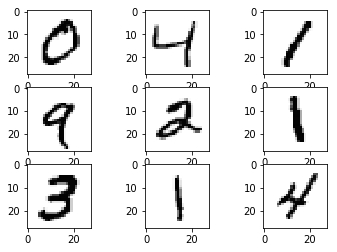

In [7]:
fig = plt.figure(33)
for i in range(1,10):
    fig.add_subplot(330+i)
    plt.imshow(X_train[i], cmap='Greys')

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0].shape

(28, 28)

In [10]:
# It looks like all images are the same shape (28x28)

set([i.shape for i in X_train])

{(28, 28)}

In [11]:
y_train.shape

(60000,)

### Try a Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.

We need to reshape the data from a 3D array to a 2D array for the *fit* function to work. 

In [14]:
nsamples, nx, ny = X_train.shape
X_train_2D = X_train.reshape((nsamples, nx*ny))

In [15]:
rfc = RandomForestClassifier()
rfc.fit(X_train_2D, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now check the accuracy.

In [16]:
Nsamples, Nx, Ny = X_test.shape
X_test_2D = X_test.reshape((Nsamples, Nx*Ny))

In [17]:
rfc.score(X_test_2D, y_test)

0.94879999999999998

In [18]:
print("Random Forest accuracy: ", rfc.score(X_test_2D, y_test))

Random Forest accuracy:  0.9488


### Try Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knc = KNeighborsClassifier()

In [21]:
knc.fit(X_train_2D, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knc.score(X_test_2D, y_test)

0.96879999999999999

### Try a Support Vector Machine

In [23]:
from sklearn.svm import SVC

In [24]:
svmc = SVC()

In [25]:
svmc.fit(X_train_2D, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
svmc.score(X_test_2D, y_test)

0.1135

In [4]:
nsamples, nx, ny = X_train.shape
X_train_2D = X_train.reshape((nsamples, nx*ny))

In [5]:
Nsamples, Nx, Ny = X_test.shape
X_test_2D = X_test.reshape((Nsamples, Nx*Ny))

In [6]:
from sklearn.svm import SVC

In [7]:
svmc = SVC()

In [8]:
svmc.fit(X_train_2D, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
svmc.score(X_test_2D, y_test)

0.1135